<a href="https://colab.research.google.com/github/zi-onion/24-2-ESAA/blob/Project/OB1_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. 한글 폰트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,199 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and dire

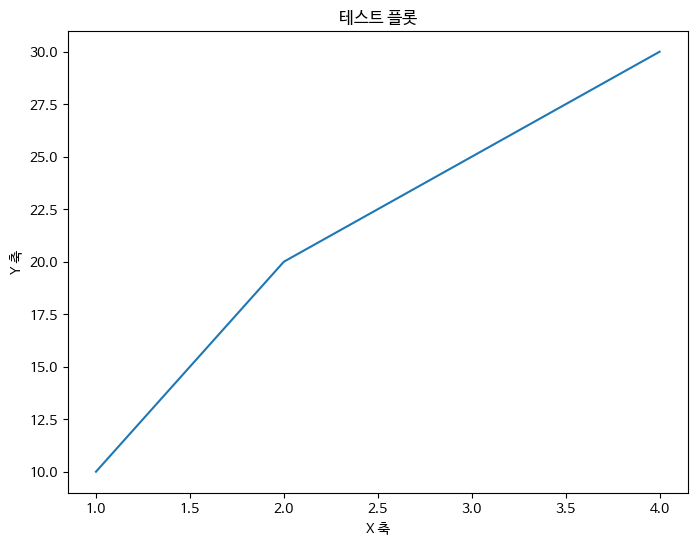

In [ ]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 플롯 예시
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title('테스트 플롯')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()

# 1. 데이터 설명

## 2023 지역축제 데이터
: 2023년에 열린 지역축제들의 축제명과 관련 정보를 가진 데이터
- 분석 과정에 불필요한 변수들 제거, 축제 방문객수와 관련이 있을 것으로 판단되는 다른 데이터들을 추가
  - 참고 논문: 이동수(2007). *지역축제 성공의 우선순위 결정요인에 대한 비교 연구*
  1. **사회문화적 요인**: 축제행사 주제(-> 축제유형), 인근지역 문화 연계성(-> 관광지개수)
  2. **환경적 요인**: 축제행사 편의시설(-> 인근 주차장 개수), 축제행사 시기 적절성(-> 축제 시작/종료일, 기간)
  3. **경제적 요인**: 재정력 규모(-> 예산), 축제지역 교통 산업화(-> 버스 정류장 공급도)

In [ ]:
fest_df = pd.read_csv('/content/drive/MyDrive/프로젝트1/행정동 확인 후 변수❤️/❤️지역축제_최종합본.csv')
fest_df

,축제명,시도,시군구,행정동,행정동코드,축제유형,시작일,종료일,기간,개최연도수,방문객수,예산,정류장공급도,공영주차장,민영주차장,주차장개수,주차구획수,관광지개수,외지인수
0,송도대표 축제,인천광역시,연수구,송도2동,2.818583e+09,전통역사,2023-09-16,2023-09-17,1,1,20000,280,17.1,73,0,73,7022,4,16614.0
1,포천 시민의날 축제,경기도,포천시,포천동,4.165051e+09,주민화합,2023-09-23,2023-09-24,1,20,40000,260,78.9,49,0,49,2978,2,11946.0
2,부조장터문화축제,경상북도,포항시,생지리,4.711125e+09,전통역사,2023-09-16,2023-09-17,1,0,20000,125,6.9,333,105,438,20426,1,21675.0
3,평택 가을 수확축제,경기도,평택시,숙성리,4.122034e+09,문화예술,2023-10-14,2023-10-15,1,1,22574,50,22.8,152,0,152,8802,1,31203.0
4,포항운하축제,경상북도,포항시,송도동,4.711155e+09,주민화합,2023-09-09,2023-09-10,1,9,30000,120,6.9,333,105,438,20426,1,17562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2023년 김광석 나의 노래 다시 부르기 대회,대구광역시,중구,대봉동,2.711068e+09,문화예술,2023-10-07,2023-10-07,0,10,2500,159,21.2,23,151,174,8764,0,12273.0
210,제51회 우륵문화제,충청북도,충주시,칠금동,4.313062e+09,문화예술,2023-09-06,2023-09-10,4,52,50000,300,0.1,7,0,7,972,4,90216.0
211,제36회 지용제,충청북도,옥천군,옥천읍,4.373025e+09,문화예술,2023-09-07,2023-09-10,3,35,63248,529,64.6,21,0,21,1261,1,68589.0
212,제46회 심훈상록문화제,충청남도,당진시,읍내동,4.427051e+09,기타,2023-09-23,2023-09-23,0,46,5000,150,1.4,10,0,10,1106,3,9729.0


In [ ]:
fest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   축제명     214 non-null    object 
 1   시도      214 non-null    object 
 2   시군구     214 non-null    object 
 3   행정동     214 non-null    object 
 4   행정동코드   214 non-null    float64
 5   축제유형    214 non-null    object 
 6   시작일     214 non-null    object 
 7   종료일     214 non-null    object 
 8   기간      214 non-null    int64  
 9   개최연도수   214 non-null    int64  
 10  방문객수    214 non-null    int64  
 11  예산      214 non-null    int64  
 12  정류장공급도  214 non-null    float64
 13  공영주차장   214 non-null    int64  
 14  민영주차장   214 non-null    int64  
 15  주차장개수   214 non-null    int64  
 16  주차구획수   214 non-null    int64  
 17  관광지개수   214 non-null    int64  
 18  외지인수    214 non-null    float64
dtypes: float64(3), int64(9), object(7)
memory usage: 31.9+ KB


- (214, 19)

## Stay 데이터
- 2023.09.01~2023.10.15까지 총 45일간의 1일 단위 데이터
- 각 날짜별로 특정 시간(1시간 단위) 동안 각 행정동에 체류한 인구에 대한 정보
  - 성별, 연령대, 방문목적
- SKTelecom에서 데이터를 제공

In [ ]:
# 2023년 9월 1일의 예시 데이터
stay_ex = pd.read_csv('/content/drive/MyDrive/프로젝트1/stay/stay_20230901_1.csv')
stay_ex

,hdong_cd,date,time,gender,age,purpose,stay_cnts
0,2811054000,20230901,13:00,1,6,0,754
1,4831055000,20230901,21:00,0,4,0,878
2,4117360000,20230901,12:00,1,1,0,904
3,1156054000,20230901,14:00,0,4,1,13729
4,4713059000,20230901,19:00,0,4,0,946
...,...,...,...,...,...,...,...
3803179,4514059500,20230901,19:00,0,5,3,17
3803180,1162060500,20230901,21:00,0,8,1,6
3803181,5175036000,20230901,20:00,0,1,4,8
3803182,4380031000,20230901,13:00,1,2,0,18


In [ ]:
# 데이터 설명
stay_ex.head(1)

,hdong_cd,date,time,gender,age,purpose,stay_cnts
0,2811054000,20230901,13:00,1,6,0,754


- **`2811054000`** 행정동에 **`2023년 09월 01일`** **`13시~14시`**에 **`귀가 목적(0)`**으로 체류한 **`60대(6)`** **`여성(1)`** 인구 = **`754명(stay_cnts)`**

# 2. 전처리
현재 불러온 **`fest_df`**는 기존에 전처리를 완료된 데이터셋이며, 전처리 과정을 설명하기 위해 아래에 코드만 첨부

In [ ]:
fest = fest_df.copy()

## 원본 데이터 개선

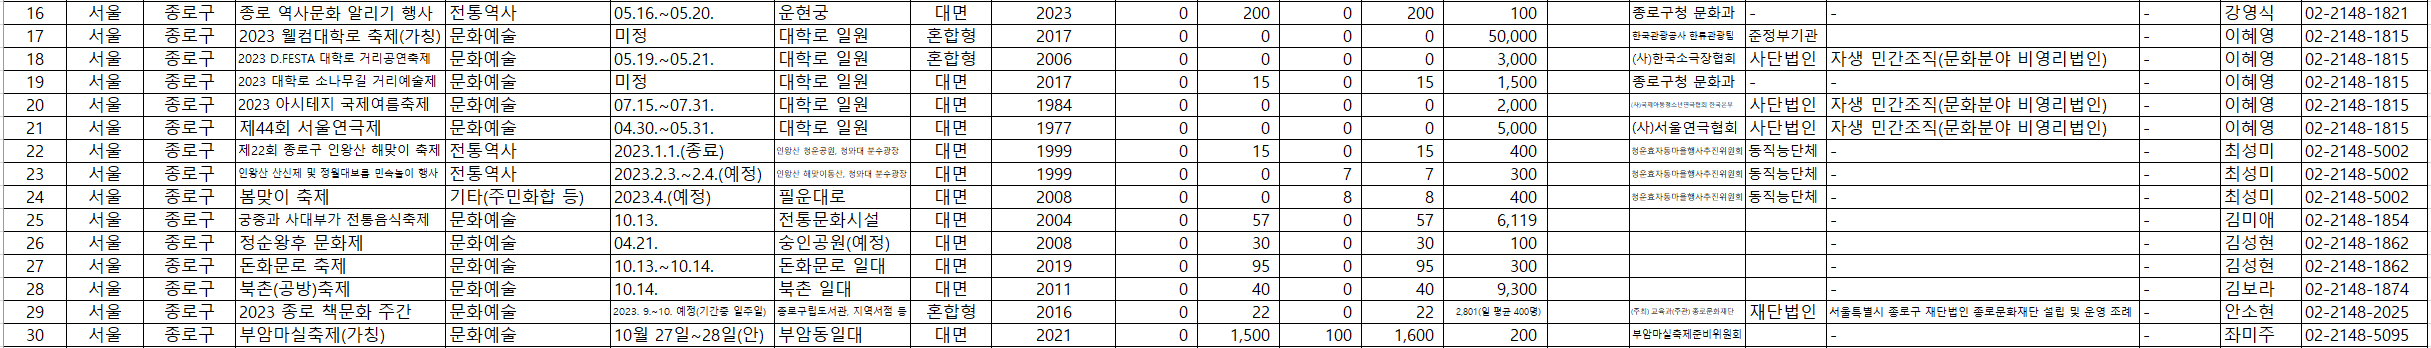

- 원본 데이터: 2023년에 개최될 지역축제 계획을 취합한 자료 => 실제 개최된 정보와 상이한 경우 다수, 데이터 형식도 통일되지 않음

**[단계]**

1. **데이터 형식 통일**: 다양한 형식으로 제공된 데이터를 일관된 형식으로 변환
2. **결측값 처리**: null 값이 포함된 항목 식별 후 적절한 방법으로 처리
3. **축제 정보 검증**: 모든 축제의 개최 정보(실제로 개최된 일시, 장소)를 직접 조사 -> 정확하게 기입되었는지 확인하고 잘못 기재된 값 수정
4. **데이터 필터링**: 보유한 stay 데이터 기간에 맞는 축제를 선별해야 했으므로 9월 1일부터 10월 15일까지 열린 축제만 추출

- 데이터의 품질 개선 및 신뢰성 확보를 위해 상당한 시간과 노력을 들여 전처리 작업을 수행

### 데이터 형식 통일 (일부 예시)

In [ ]:
# 축제유형 형식 통일

def fest_cat(x):
  if '전통' in x:
    return '전통역사'
  elif '특산' in x:
    return '특산물'
  elif '생태' in x:
    return '생태자연'
  elif '주민' in x:
    return '주민화합'
  elif '문화예술' in x:
    return '문화예술'
  else:
    return '기타'

#fest2023.축제유형 = fest2023.축제유형.apply(lambda x: fest_cat(x))

- 전처리 전

  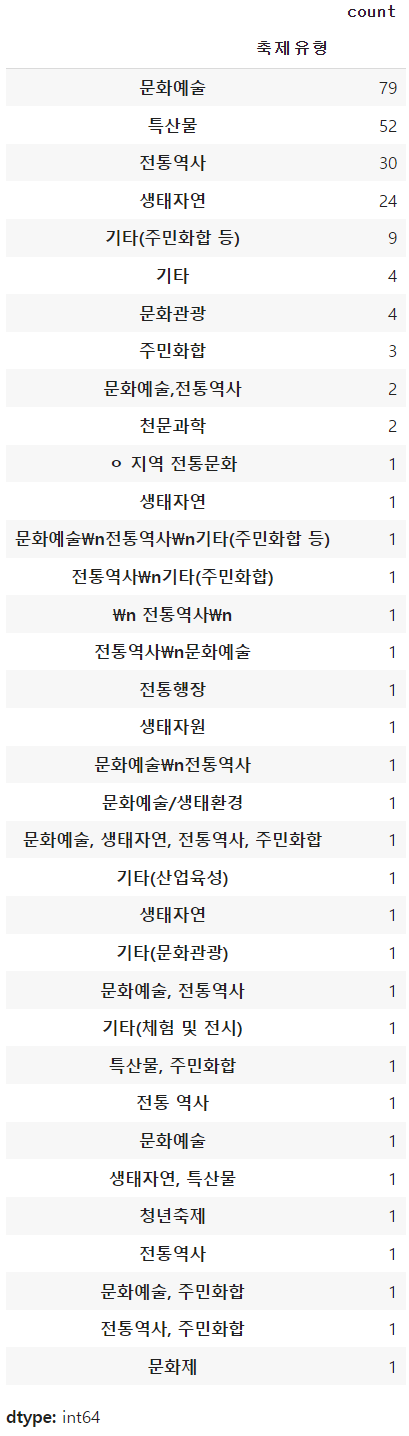
- 전처리 후

  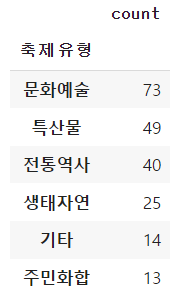

## 외지인수 함수 정의
체류인구 데이터를 지역축제와 결합하기 위해, 축제 기간 동안 각 축제가 열린 행정동으로 유입된 인구수를 '외지인수'라는 파생변수로 정의

**[외지인수 추정 과정]**
- 해당 날짜의 체류인구수가 최솟값(min)인 시점 -> 해당 지역의 거주 인구수로 간주
- 해당 날짜의 체류인구수가 최댓값(max)인 시점 -> 여행 등 다양한 목적으로 유입된 인구수가 더해진 값으로 해석

  => (max - min) : 지역으로 유입된 인구수
- 전체 통신사 중 SKT의 비중을 약 1/3로 가정하여, 실제 유입 인구수는 계산된 값의 3배로 조정

- 예시
  - 16시(max) - 8시(min) => 약 6000명의 유입인구

  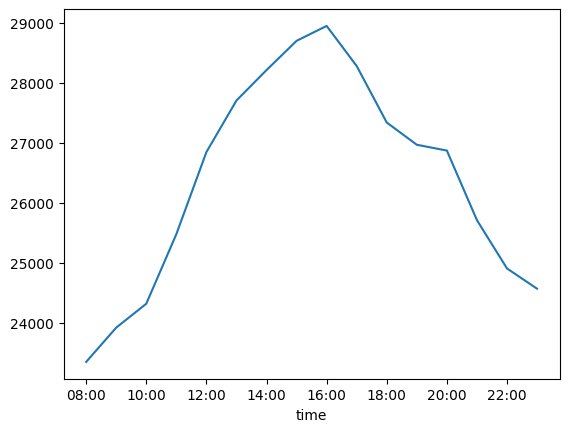

In [ ]:
def calulate_foriegn(stay_df_list, dong_code):
  stay_sum = 0
  skt_per = 1/3
  for stay_df in stay_df_list:
    stay_time = stay_df[stay_df.hdong_cd==dong_code].groupby('time')['stay_cnts'].sum()
    print(stay_time.min(), stay_time.max(), stay_time.max()-stay_time.min())
    stay_minmax = stay_time.max()-stay_time.min()
    stay_sum += stay_minmax
  foriegn = stay_sum/skt_per
  return foriegn

In [ ]:
def load_stay_df(festival_df):
    festival_df['외지인수'] = 0
    for index, row in festival_df.iterrows():
        stay_list = []
        start_date = row['시작일']
        end_date = row['종료일']
        h_code = row['행정동코드']
        fest_range = pd.date_range(start_date, end_date)

        for date in fest_range:
            file_name = f"stay_{date.strftime('%Y%m%d')}_1.csv"
            file_path = f"/content/drive/MyDrive/프로젝트1/stay/{file_name}"

            if os.path.exists(file_path):
                stay_df = pd.read_csv(file_path)
                stay_list.append(stay_df)
                print(f"Loaded: {file_path}")
            else:
                print(f"File not found: {file_path}")

        for_num = calulate_foriegn(stay_list, h_code)
        festival_df.iloc[index, -1] = for_num

- `load_stay_df(festival_df)` 함수
  - 지역축제 데이터를 입력받아 축제의 시작일과 종료일에 해당하는 stay 데이터 파일 불러오기
  - 불러온 데이터는 리스트에 각 데이터프레임 형태로 저장되며, 이 과정에서 계산된 '외지인수'가 새로운 변수의 값으로 저장
- `calculate_foriegn(stay_list, h_code)` 함수
  - stay 데이터 리스트와 축제가 열린 행정동 코드를 입력받아, 해당 지역의 외지인수를 추정하고 반환

In [ ]:
# 함수 적용
#load_stay_df(fest)

- 출력 예시

  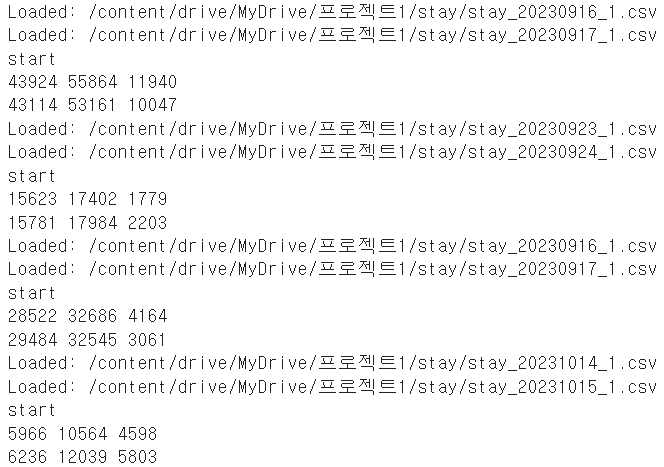

- 적용 전

  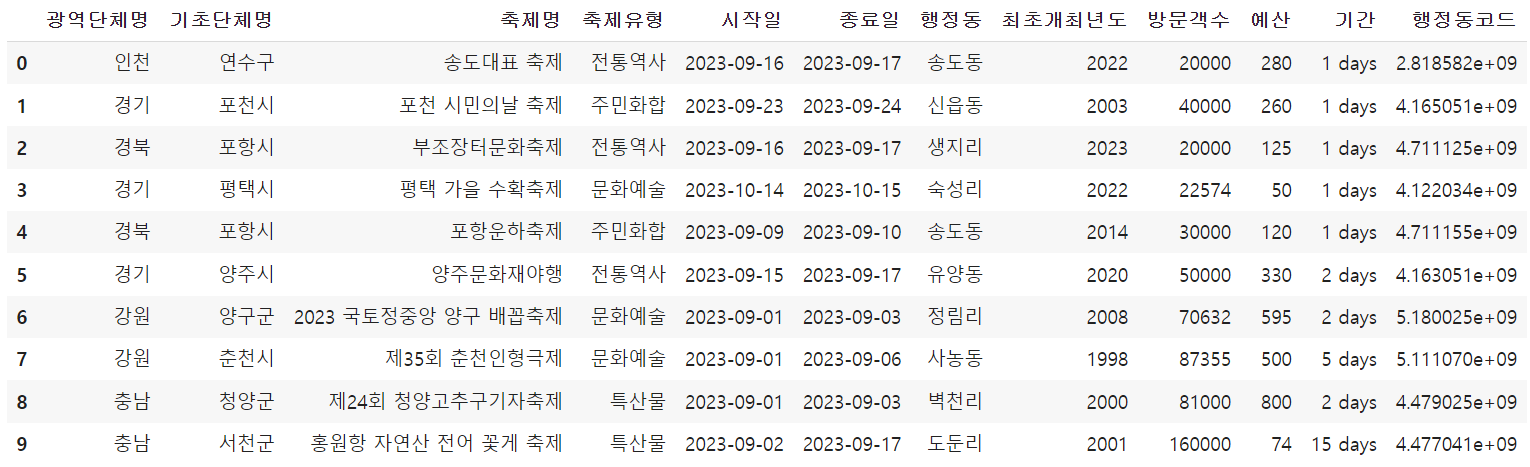
- 적용 후

  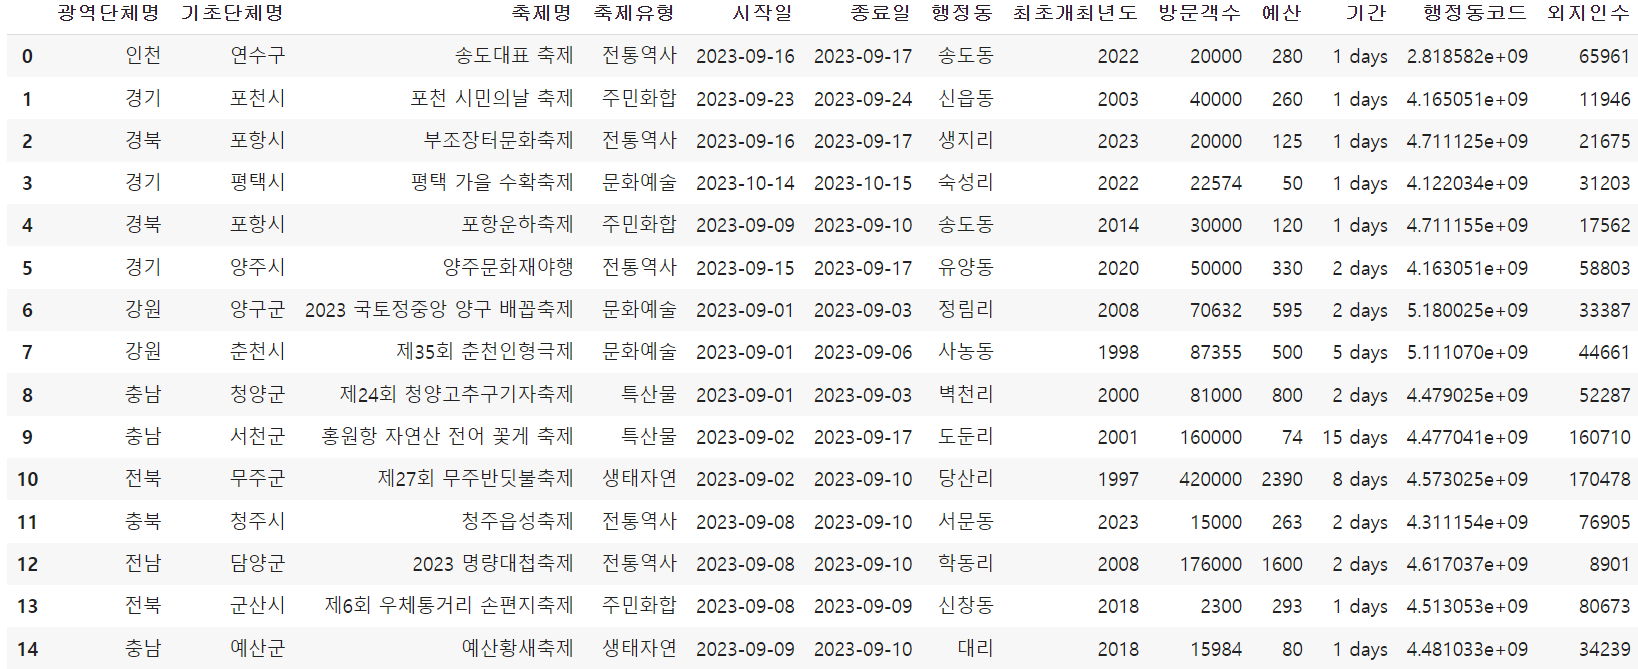

## 일별 데이터 변환
- 축제 기간 동안 합산된 `방문객수`, `외지인수`, `예산`값을 `기간`으로 나눠서 일별 데이터로 변환

In [ ]:
# 방문객수
fest['일별방문객수'] = fest_df['방문객수']/(fest_df['기간']+1)
# 외지인수
fest['일별외지인수'] = fest_df['외지인수']/(fest_df['기간']+1)
# 예산
fest['일별예산'] = fest_df['예산']/(fest_df['기간']+1)
# 처리 후 칼럼 삭제
fest = fest.drop(columns=['방문객수', '외지인수', '예산'])

In [ ]:
fest.head()

,축제명,시도,시군구,행정동,행정동코드,축제유형,시작일,종료일,기간,개최연도수,정류장공급도,공영주차장,민영주차장,주차장개수,주차구획수,관광지개수,일별방문객수,일별외지인수,일별예산
0,송도대표 축제,인천광역시,연수구,송도2동,2.818583e+09,전통역사,2023-09-16,2023-09-17,1,1,17.1,73,0,73,7022,4,10000.0,8307.0,140.0
1,포천 시민의날 축제,경기도,포천시,포천동,4.165051e+09,주민화합,2023-09-23,2023-09-24,1,20,78.9,49,0,49,2978,2,20000.0,5973.0,130.0
2,부조장터문화축제,경상북도,포항시,생지리,4.711125e+09,전통역사,2023-09-16,2023-09-17,1,0,6.9,333,105,438,20426,1,10000.0,10837.5,62.5
3,평택 가을 수확축제,경기도,평택시,숙성리,4.122034e+09,문화예술,2023-10-14,2023-10-15,1,1,22.8,152,0,152,8802,1,11287.0,15601.5,25.0
4,포항운하축제,경상북도,포항시,송도동,4.711155e+09,주민화합,2023-09-09,2023-09-10,1,9,6.9,333,105,438,20426,1,15000.0,8781.0,60.0


# 3. EDA

**target(방문객수) 분포 확인**

<Axes: title={'center': '일별방문객수 distribution'}>

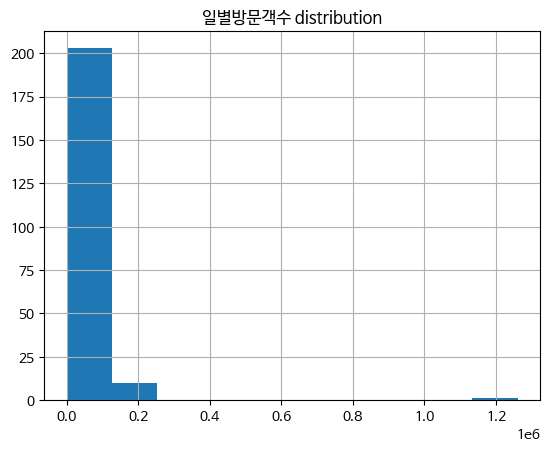

In [ ]:
plt.title('일별방문객수 distribution')
fest.일별방문객수.hist()

- right skewed가 심함

In [ ]:
fest.일별방문객수.sort_values(ascending=False)

,일별방문객수
99,1.260000e+06
37,2.384104e+05
36,1.740000e+05
34,1.702931e+05
129,1.651866e+05
...,...
192,4.000000e+02
88,3.333333e+02
143,2.500000e+02
121,2.333333e+02


- 직전 값보다 약 5배 이상 큰 Max 데이터 1개는 이상치로 판단하고, 모델 성능을 위해 drop

In [ ]:
fest.drop(index=[99], inplace=True)

Text(0.5, 1.0, 'Outlier 제거 후 분포')

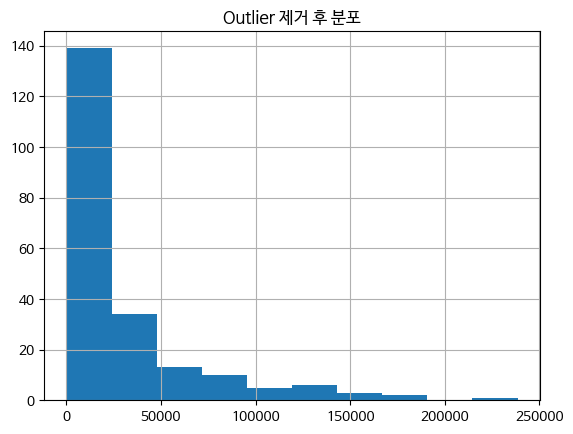

In [ ]:
fest.일별방문객수.hist()
plt.title('Outlier 제거 후 분포')

**상관계수 heatmap**

<Axes: >

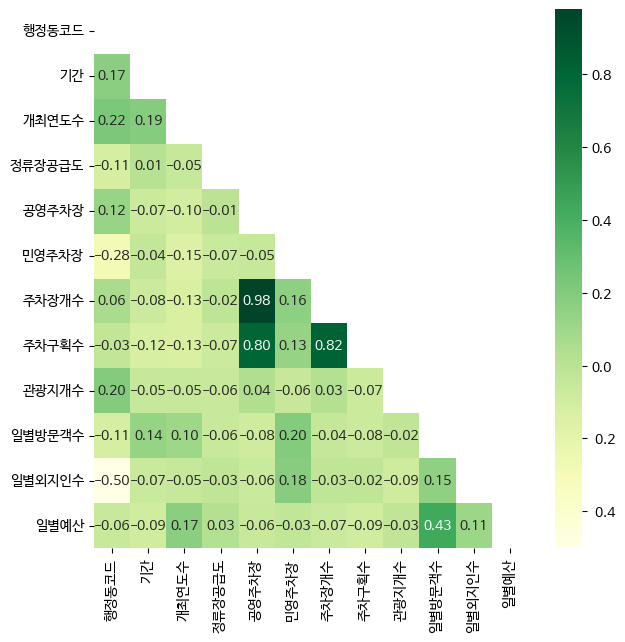

In [ ]:
corr_df = fest.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(7,7))

mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='YlGn', mask=mask)

- 일별예산, 민영주차장, 일별외지인수, 기간, 개최연도수 등이 방문객수와 상관관계를 보임
- 주차장 관련 변수들 간의 상관관계가 매우 높으므로 일부 변수만 선택하여 사용

# 4. 회귀 모델
- 자료 조사를 통해 선정한 변수들이 실제로 방문객수와 관련이 있는지, 어떤 변수가 방문객수를 잘 설명할 수 있는지 분석하기 위하여 진행

1. **회귀 모델 구축**: 방문객수를 종속 변수(target)로 설정하고, 선정된 변수들을 독립 변수로 하여 회귀 모델 구축
2. **모델 성능 평가**: 여러 회귀 모델을 적용하여 성능을 비교하고, 가장 높은 성능을 보이는 모델을 선정
  - 성능 평가 지표: RMSE(평균 제곱근 편차)
3. **주요 요인 분석**: 성능이 우수한 모델에서 feature importance를 분석하여 방문객수에 가장 큰 영향을 미치는 주요 요인을 선정
  - 각 변수의 중요성을 평가하고, 축제 방문객수 예측에 기여할 수 있는 인사이트를 도출

### Linear - Lasso
* 독립 변수
  * 범주형 변수 : 시도, 시군구, 행정동, 축제유형, 축제명
  * 연속형 변수 : 기간, 개최 연도 수, 정류장 공급도, 주차 구획 수, 주차장 개수, 일별 외지인 수, 일별 예산

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X = fest.drop(columns=['일별방문객수', '행정동코드', '시작일', '종료일', '민영주차장', '공영주차장'])
# 모든 범주형 변수 원핫 인코딩
X = pd.get_dummies(X, columns=['시도', '시군구', '행정동', '축제유형', '축제명'], drop_first=True).astype(int)
y = fest['일별방문객수']

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

lasso = Lasso(alpha=10, max_iter=5000) # 그리드 서치 결과 가장 좋은 alpha 값 10
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 20487.968152796046


<Axes: ylabel='None'>

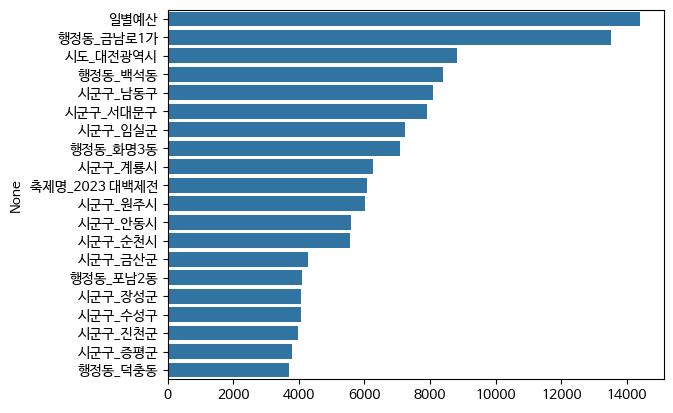

In [ ]:
coef = pd.Series(lasso.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

* 일별 예산 > 행정동_금남로1가 > 시도_대전광역시 > ...

### RandomForest
* 독립 변수
  * 범주형 변수 : 시도, 축제유형
  * 연속형 변수 : 기간, 개최 연도 수, 정류장 공급도, 주차 구획 수, 주차장 개수, 일별 외지인 수, 일별 예산

**전처리**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

rf_df = fest.drop(columns=['축제명', '시작일', '종료일', '시군구', '행정동', '행정동코드', '민영주차장', '공영주차장'])

# label encoding
le = LabelEncoder()
sido_le = le.fit_transform(rf_df['시도'])
rf_df['시도'] = sido_le
type_le = le.fit_transform(rf_df['축제유형'])
rf_df['축제유형'] = type_le

# X, y / train, test split
X = rf_df.drop(columns=['일별방문객수'])
y = rf_df['일별방문객수']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# log Transform
y_train_log = np.log(y_train)

(170, 10) (43, 10) (170,) (43,)


- '민영주차장', '공영주차장'은 다른 주차장 관련 변수와 상관관계가 매우 높았으므로 drop
- target인 '방문객수'의 right skewed 정도가 심했기 때문에, log transform을 적용

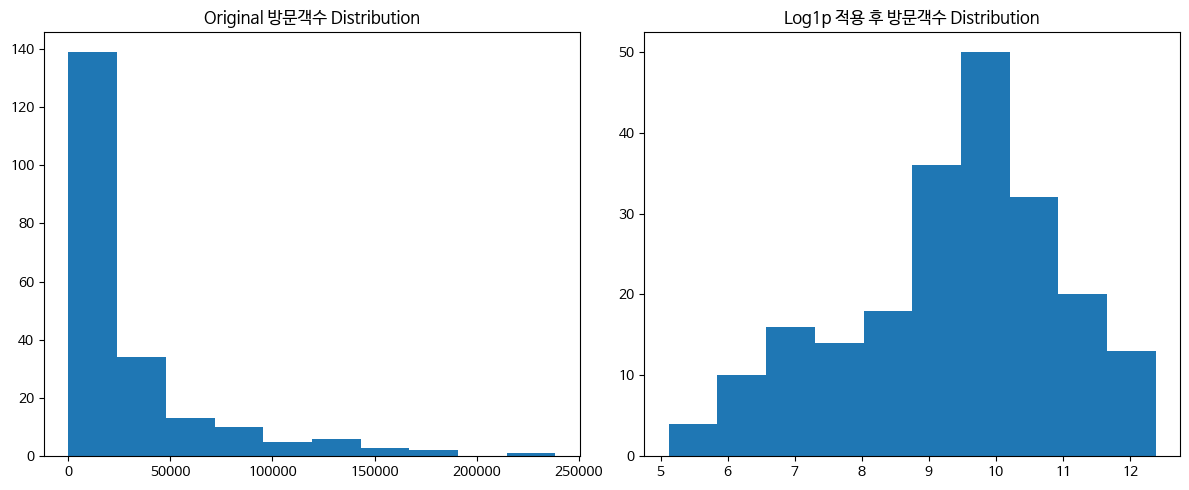

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(fest['일별방문객수'])
axes[0].set_title('Original 방문객수 Distribution')

axes[1].hist(np.log1p(fest['일별방문객수']))
axes[1].set_title('Log1p 적용 후 방문객수 Distribution')

plt.tight_layout()

- Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# grid search로 탐색한 뒤 하이퍼 파라미터 적용
rf = RandomForestRegressor(max_depth=None, n_estimators=10, random_state=50)
rf.fit(X_train, y_train_log)

y_pred_log = rf.predict(X_test)
y_pred = np.exp(y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse:.4f}")

RMSE: 22644.6193


- feature importance

Text(0, 0.5, 'Feature')

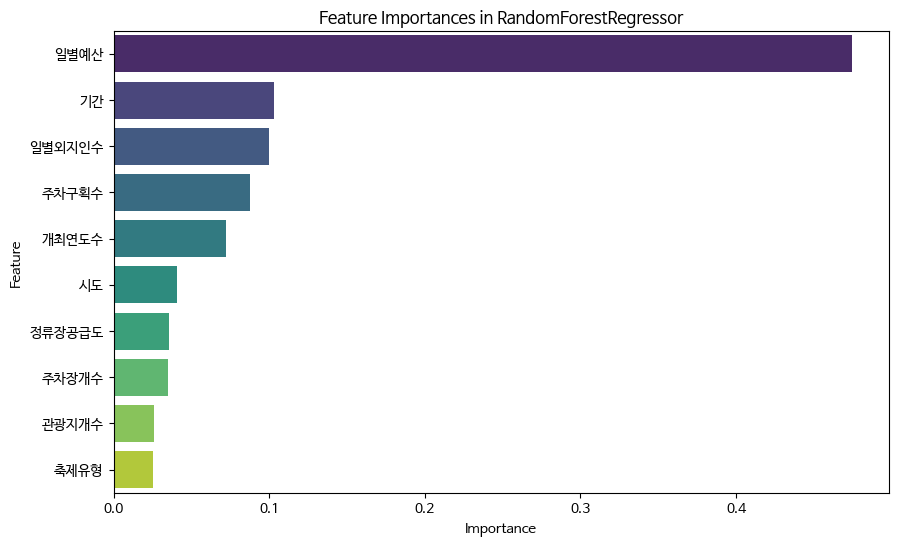

In [ ]:
importances = rf.feature_importances_
features = X_train.columns

indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = features[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette='viridis')
plt.title('Feature Importances in RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')

- 일별예산 > 기간 > 일별외지인수 > 주차구획수 > 개최연도수 순으로 중요도를 보임

### LightGBM
* 독립 변수
  * 범주형 변수 : 시도, 축제유형 One Hot Encoding
  * 연속형 변수 : 행정동 코드, 기간, 개최 연도 수, 일별 예산, 정류장 공급도, 주차장 개수, 주차 구획 수, 관광지 개수, 일별 외지인 수
* 종속 변수 : 일별 방문객 수

* 데이터 전처리




In [ ]:
lgbm_df = fest[['시도','행정동코드','축제유형', '기간', '일별방문객수','개최연도수', '일별예산','정류장공급도', '주차장개수', '주차구획수', '관광지개수','일별외지인수']]
lgbm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      213 non-null    object 
 1   행정동코드   213 non-null    float64
 2   축제유형    213 non-null    object 
 3   기간      213 non-null    int64  
 4   일별방문객수  213 non-null    float64
 5   개최연도수   213 non-null    int64  
 6   일별예산    213 non-null    float64
 7   정류장공급도  213 non-null    float64
 8   주차장개수   213 non-null    int64  
 9   주차구획수   213 non-null    int64  
 10  관광지개수   213 non-null    int64  
 11  일별외지인수  213 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 21.6+ KB


In [ ]:
#'시도','축제유형'

one_hot_encoded = pd.get_dummies(lgbm_df, columns=['시도','축제유형'])
print(one_hot_encoded)

            행정동코드  기간   일별방문객수  개최연도수    일별예산  정류장공급도  주차장개수  주차구획수  관광지개수  \
0    2.818583e+09   1  10000.0      1  140.00    17.1     73   7022      4   
1    4.165051e+09   1  20000.0     20  130.00    78.9     49   2978      2   
2    4.711125e+09   1  10000.0      0   62.50     6.9    438  20426      1   
3    4.122034e+09   1  11287.0      1   25.00    22.8    152   8802      1   
4    4.711155e+09   1  15000.0      9   60.00     6.9    438  20426      1   
..            ...  ..      ...    ...     ...     ...    ...    ...    ...   
209  2.711068e+09   0   2500.0     10  159.00    21.2    174   8764      0   
210  4.313062e+09   4  10000.0     52   60.00     0.1      7    972      4   
211  4.373025e+09   3  15812.0     35  132.25    64.6     21   1261      1   
212  4.427051e+09   0   5000.0     46  150.00     1.4     10   1106      3   
213  2.635056e+09   1   1000.0      6   45.00    34.7    158   6905      4   

       일별외지인수  ...  시도_전라북도  시도_제주특별자치도  시도_충청남도  시도_충청북도  축제유형

In [ ]:
target = one_hot_encoded['일별방문객수']
ftr = one_hot_encoded.drop('일별방문객수',axis=1)

* train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ftr,target,test_size=0.2,random_state=100)

* Model

In [ ]:
from lightgbm import LGBMRegressor
from lightgbm import early_stopping

# LightGBM 회귀 모델 생성
lgbm_reg = LGBMRegressor(random_state=100, verbose=-1)

# 모델 학습
evals = [(X_train, y_train), (X_test, y_test)]
lgbm_reg.fit(X_train, y_train,
              eval_metric="l2",
              eval_set=evals,
              callbacks=[early_stopping(10)])  # 10 라운드 동안 성능 개선이 없으면 중지

# 예측
predictions = lgbm_reg.predict(X_test)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[27]	training's l2: 7.25925e+08	valid_1's l2: 5.11575e+08


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 성능 평가
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE 계산
r2 = r2_score(y_test, predictions)

# 결과 출력
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 16639.62468255193
MSE: 511574998.6905274
RMSE: 22618.023757404786
R²: 0.2332591369324274


* GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 80, 100],
    'learning_rate': [0.05, 0.1, 0.3],
    'num_leaves': [10, 30,45],
    'max_depth': [-1, 10, 20]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=lgbm_reg,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1)

# 모델 학습
grid_search.fit(X_train, y_train,
              eval_metric="l2",
              eval_set=evals,
              callbacks=[early_stopping(10)])

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 1.13788e+09	valid_1's l2: 5.1194e+08
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's l2: 9.91967e+08	valid_1's l2: 5.29523e+08
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	valid_0's l2: 1.12214e+09	valid_1's l2: 5.4258e+08
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 1.13788e+09	valid_1's l2: 5.1194e+08
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's l2: 9.91967e+08	valid_1's l2: 5.29523e+08
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	valid_0's l2: 1.12214e+09	valid_1's l2: 5.4258e+0

In [ ]:
# 최적 모델로 예측
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


# 성능 평가
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE 계산
r2 = r2_score(y_test, predictions)

# 결과 출력
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 16639.62468255193
MSE: 511574998.6905274
RMSE: 22618.023757404786
R²: 0.2332591369324274


* 중요 피쳐 시각화

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 중요 feature 추출
feature_importances = best_model.feature_importances_
features = ftr.columns
lgbm_reg

LGBMRegressor(random_state=100, verbose=-1)

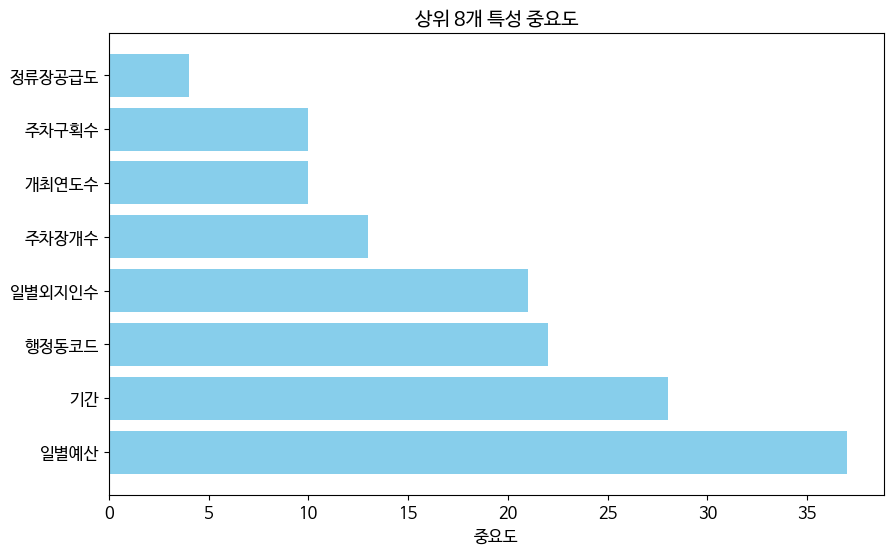

In [ ]:
feature_importances = lgbm_reg.feature_importances_
features = ftr.columns

# 피처 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    '특성': features,
    '중요도': feature_importances
}).sort_values(by='중요도', ascending=False)

# 상위 20개의 피처만 추출 (피처가 20개 미만이면 모두 표시)
top_20_features = importance_df.head(8)

# 중요 피처 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['특성'], top_20_features['중요도'], color='skyblue')
plt.xlabel('중요도', fontsize=12)
plt.title('상위 8개 특성 중요도', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# 그래프의 모든 텍스트 요소에 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
plt.show()

- 일별예산 > 기간 > 행정동코드 > 일별외지인수 > 주차장개수 순으로 중요도를 보임

### catboost
범주형 데이터를 효율적으로 처리하는 머신러닝 라이브러리. 범주형 변수가 많거나 데이터의 구조가 복잡한 문제에서 뛰어난 성능을 발휘한다.
* 범주형 데이터 자동 처리
* 과적합 방지 : 데이터 순서를 랜덤하게 셔플링하는 방식 사용
* 의사결정 트리 기반 : 앙상블 방식으로 약한 학습기를 결합하여 예측 모델을 만든다.

* 독립 변수
  * 범주형 변수 : 시도, 시군구, 행정동, 축제유형, 축제명
  * 연속형 변수 : 개최 연도 수, 정류장 공급도, 주차 구획 수, 주차장 개수, 일별 외지인 수, 일별 예산

In [ ]:
#!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

X = fest.drop(columns=['일별방문객수', '행정동코드', '시작일', '종료일', '민영주차장', '공영주차장'])
y = fest['일별방문객수']

categorical_features = ['축제유형', '축제명', '시도', '시군구', '행정동']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

catboost_reg = CatBoostRegressor(cat_features=categorical_features, verbose=0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.01)

catboost_reg.fit(X_train, y_train)

y_pred = catboost_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(f"Test set RMSE: {rmse}")

Test set RMSE: 23380.09498061798


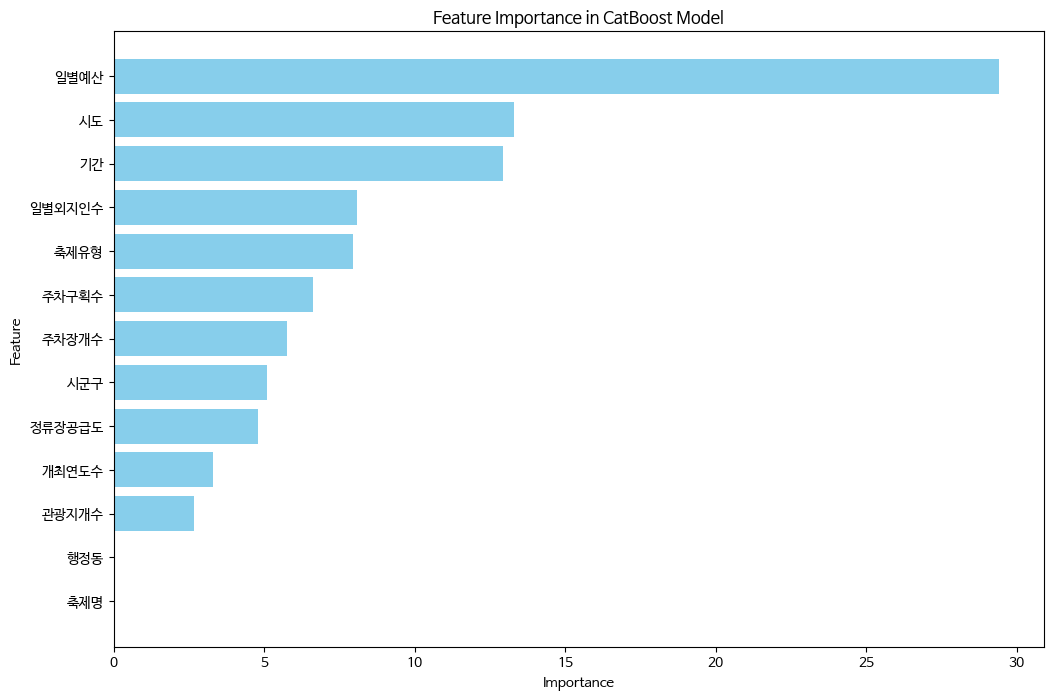

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 피처 중요도 추출
feature_importances = catboost_reg.get_feature_importance()
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

- 일별예산 > 시도 > 기간 > 일별외지인수 > 축제유형 순으로 중요도를 보임

### XGBoost

- 변수 전처리 코드

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지 필터링
plt.rc('font', family='NanumBarunGothic') # 한글 깨짐 방지

fest = fest.set_index('축제명')

fest.drop(columns = ['시작일','종료일'], inplace=True)

# 레이블 인코딩 진행
le = LabelEncoder()
fest['시도'] = le.fit_transform(fest['시도'])
fest['축제유형'] = le.fit_transform(fest['축제유형'])

- 회귀 모델을 적용했을 때, '시작일', '종료일' 칼럼을 제외한 모델의 성능이 좋았으므로 drop
- '시도', '축제유형' 변수는 문자로 되어있고, 범주형 변수이므로 레이블 인코딩 진행

In [ ]:
X = fest.drop(columns=['일별방문객수', '행정동', '시군구', '주차장개수'], axis=1)
y = fest['일별방문객수']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=100)

- 타겟변수 : 방문객수
- '행정동', '시군구' 칼럼은 공통적인 특징이 존재하지 않으므로 drop
- '주차장개수'는 주차구획수와 비슷한 특성을 가지므로 drop

- 파라미터 조정을 하지 않은 기본 model
  - RMSE=29008.86

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 29008.863733985752


- 파라미터 조정을 하지 않은 기본 model의 feature importance
  - '민영주차장', '일별예산', '기간' 순으로 중요도를 보임

Text(0.5, 1.0, 'XGB Feature Importance')

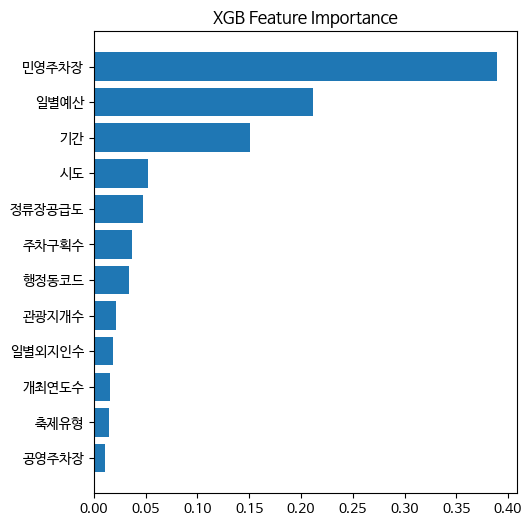

In [ ]:
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("XGB Feature Importance")

- 하이퍼 파라미터 조정한 model
  - RMSE = 28144.68로 기본 모델보다 감소함

In [ ]:
xgb1 = XGBRegressor(learning_rate=0.01, n_estimators=200)
xgb1.fit(X_train, y_train)

y_pred = xgb1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 28144.677929597612


- 하이퍼 파라미터 조정한 model의 feature importance
  - '일별예산', '민영주차장', '시도', '정류장공급도' 순으로 중요도를 보임

Text(0.5, 1.0, 'XGB Feature Importance')

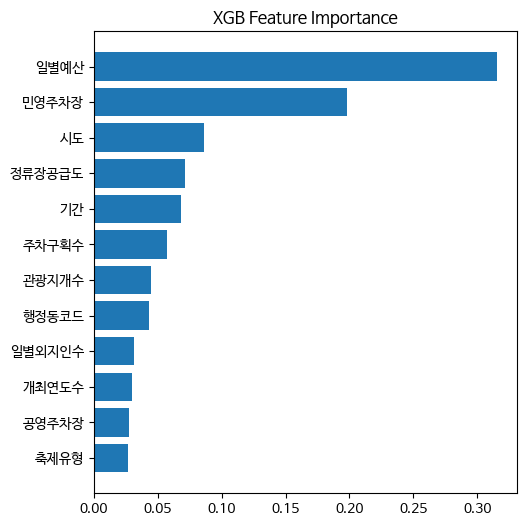

In [ ]:
feature_importance = xgb1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("XGB Feature Importance")

- y에 해당하는 방문객수 칼럼이 왜곡을 보이는 분포이기 때문에 로그변환 진행 후 모델링
  - RMSE = 23163.54로 감소

In [ ]:
# 로그변환
X = fest.drop(columns=['일별방문객수', '행정동', '시군구', '주차장개수'], axis=1)
y = fest['일별방문객수']
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

xgb2 = XGBRegressor(learning_rate=0.01, n_estimators=200)
xgb2.fit(X_train, y_train)

pred = xgb2.predict(X_test)
y_pred = np.expm1(pred)
y_test = np.expm1(y_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 23163.544962616867


- 로그변환 후 파라미터 조정한 model의 feature importance
  - '일별예산', '기간', '주차구획수' '개최연도수' 순으로 중요도를 보임

Text(0.5, 1.0, 'XGB Feature Importance')

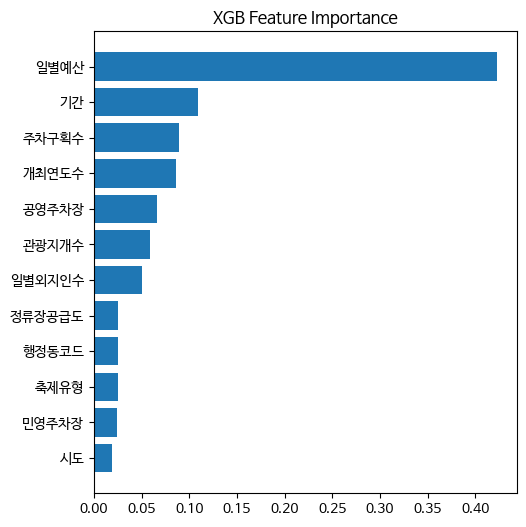

In [ ]:
feature_importance = xgb2.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("XGB Feature Importance")

# 5. 군집화

1. 군집화 : Kmeans 클러스터링 k=4
2. 차원축소 : t-SNE
  * t-SNE는 비선형 변환 기법으로 고차원 공간에서 가까운 데이터 포인트를 저차원 공간에서도 가깝게 유지하도록 변환한다. 데이터 간의 유사성을 반영하여 저차원 공간에서 클러스터링이나 구조적 패턴을 시각화한다.
  * PCA : 선형 변환 기법으로 선형 관계에 기반한 분석이며 데이터 분산을 최대화하는 방향으로 축소한다.

## 군집화 및 시각화 함수

In [ ]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Elbow Method를 통해 최적의 클러스터 수 찾기
def plot_elbow(X_features):
    distortions = []
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(X_features)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, 10), distortions, marker='o', linestyle='--')
    plt.title('Elbow Method For Optimal Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

def visualize_silhouette_kmeans(cluster_lists, X_features):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, init='k-means++', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
    plt.show()

## 군집화

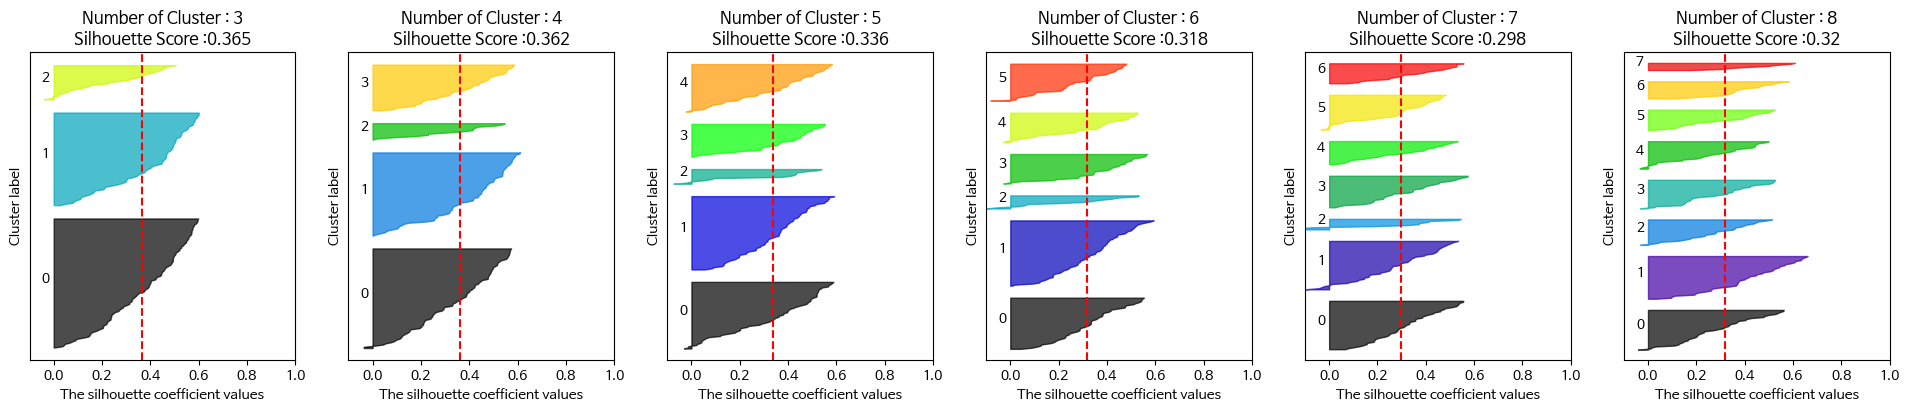

In [ ]:
# feature selection
selected = fest[['축제명', '일별예산', '기간', '일별외지인수', '개최연도수', '주차구획수']].set_index('축제명')

# log transform
selected_log = selected.copy()
selected_log.iloc[:,:-1] = np.log1p(selected_log.iloc[:,:-1])

# boxcox
selected_bc = selected_log.copy()
selected_bc['주차구획수'] = selected_bc['주차구획수'].replace(0,1)
selected_bc['주차구획수'], fit_lambda = boxcox(selected_bc['주차구획수'])

# standard scaling
scaler = StandardScaler()
scaler.fit(selected_bc)
seleted_scaled = selected_bc.copy()
seleted_scaled[seleted_scaled.columns] = scaler.transform(seleted_scaled)

# PCA 수행
selected_pca = seleted_scaled.copy()
pca = PCA(n_components=2, random_state=0)
selected_pca = pca.fit_transform(selected_pca)

visualize_silhouette_kmeans([3,4,5,6,7,8], selected_pca)

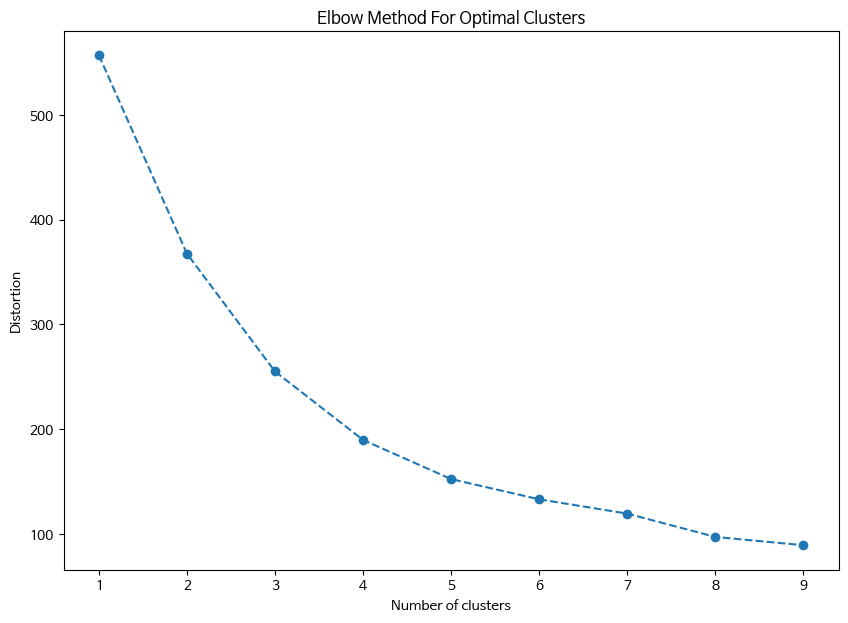

In [ ]:
plot_elbow(selected_pca)

In [ ]:
# KMeans 클러스터링 적용
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=0)
kmeans_labels = kmeans.fit_predict(selected_pca)
sil_avg = silhouette_score(selected_pca, kmeans_labels)
pd.Series(kmeans_labels).value_counts()

,count
0,86
1,72
3,40
2,15


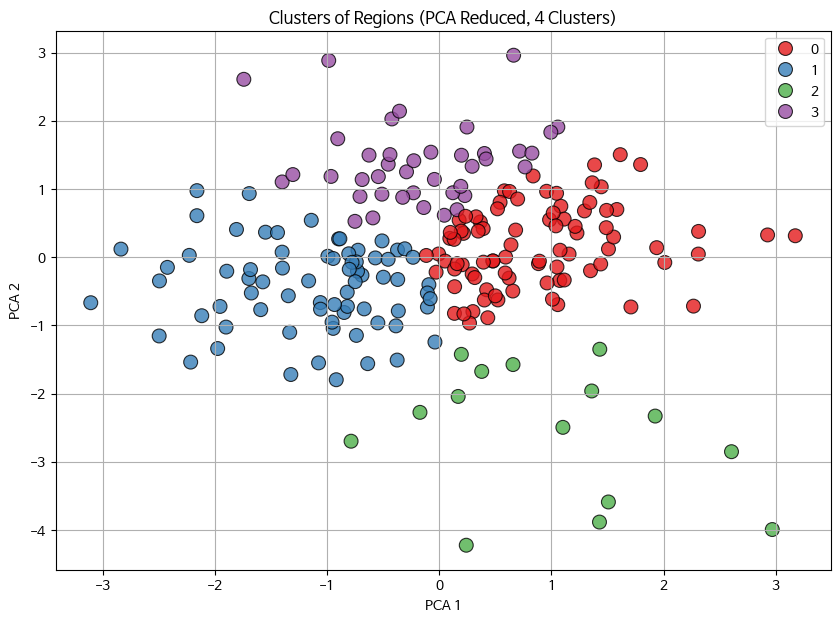

In [ ]:
# 클러스터 레이블 추가된 데이터프레임 생성
df_with_labels = pd.DataFrame(selected, columns=selected.columns)
df_with_labels['Cluster'] = kmeans_labels

# 클러스터별 평균값 계산
feature_means_by_cluster = df_with_labels.groupby('Cluster').mean()

# t-SNE 차원으로 클러스터 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x=selected_pca[:, 0], y=selected_pca[:, 1], hue=kmeans_labels, edgecolor='k', s=100, alpha=0.8, palette='Set1')
plt.title('Clusters of Regions (PCA Reduced, 4 Clusters)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# 6. 군집 분석

In [ ]:
fest_cluster = fest.copy()
fest_cluster['군집'] = kmeans_labels
fest_cluster['군집'].value_counts()

,count
군집,
0,86
1,72
3,40
2,15


- 총 214개의 축제가 4개의 군집으로 나뉨

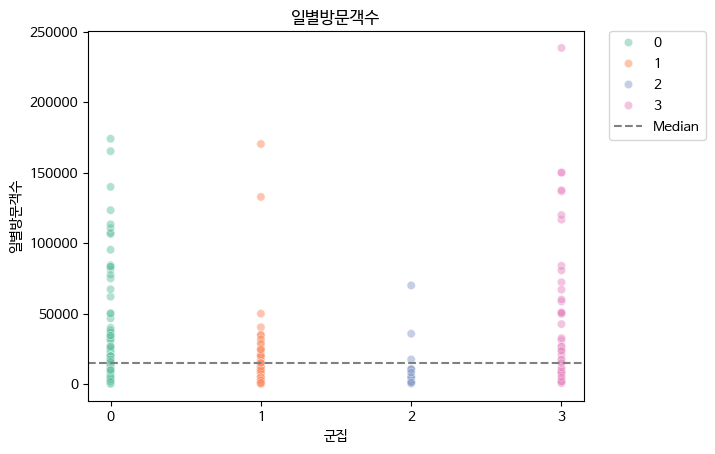

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='일별방문객수', hue='군집', alpha=0.5, palette=sns.color_palette("Set2"))
plt.xticks(ticks=[0,1,2,3])
plt.axhline(fest_cluster['일별방문객수'].median(), color='gray', linestyle='--', label='Median')
plt.title('일별방문객수')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

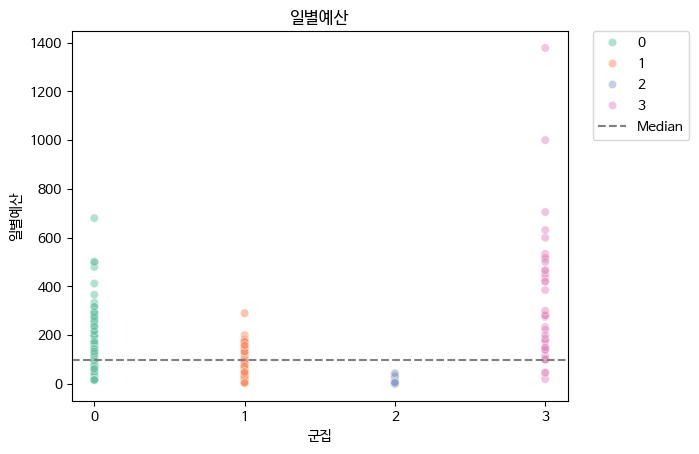

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='일별예산', hue='군집', alpha=0.5, palette=sns.color_palette("Set2"))
plt.xticks(ticks=[0,1,2,3])
plt.axhline(fest_cluster['일별예산'].median(), color='gray', linestyle='--', label='Median')
plt.title('일별예산')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

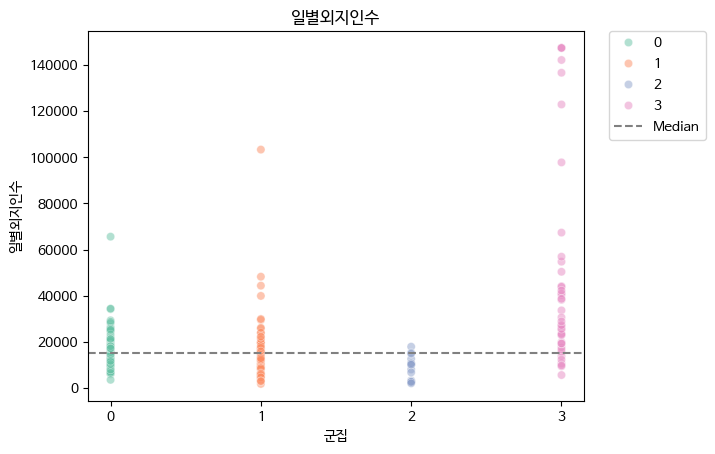

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='일별외지인수', hue='군집', alpha=0.5, palette=sns.color_palette("Set2"))
plt.xticks(ticks=[0,1,2,3])
plt.axhline(fest_cluster['일별외지인수'].median(), color='gray', linestyle='--', label='Median')
plt.title('일별외지인수')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

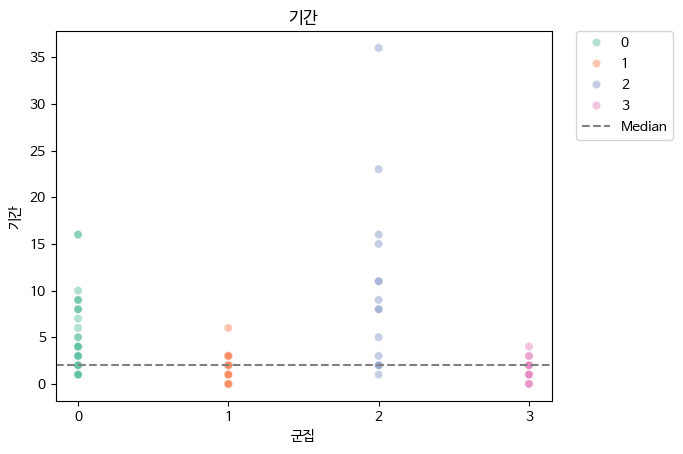

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='기간', hue='군집', alpha=0.5, palette=sns.color_palette("Set2"))
plt.xticks(ticks=[0,1,2,3])
plt.axhline(fest_cluster['기간'].median(), color='gray', linestyle='--', label='Median')
plt.title('기간')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

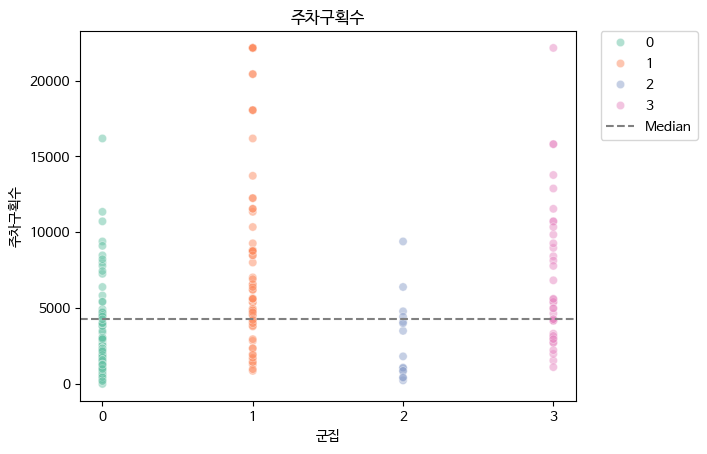

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='주차구획수', hue='군집', alpha=0.5, palette=sns.color_palette("Set2"))
plt.xticks(ticks=[0,1,2,3])
plt.axhline(fest_cluster['주차구획수'].median(), color='gray', linestyle='--', label='Median')
plt.title('주차구획수')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

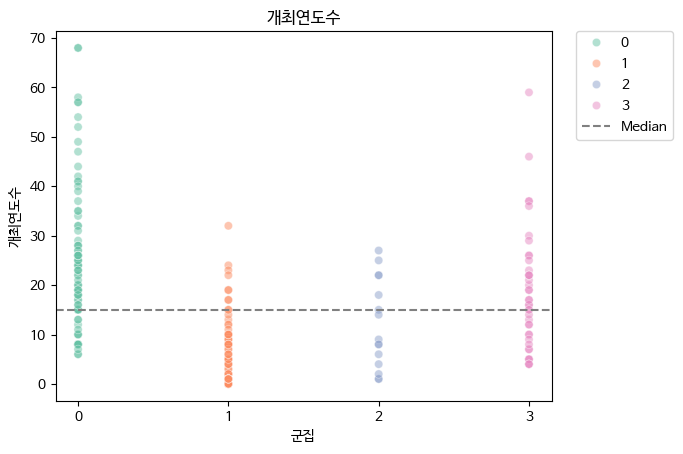

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='개최연도수', hue='군집', alpha=0.5, palette=sns.color_palette("Set2"))
plt.xticks(ticks=[0,1,2,3])
plt.axhline(fest_cluster['개최연도수'].median(), color='gray', linestyle='--', label='Median')
plt.title('개최연도수')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

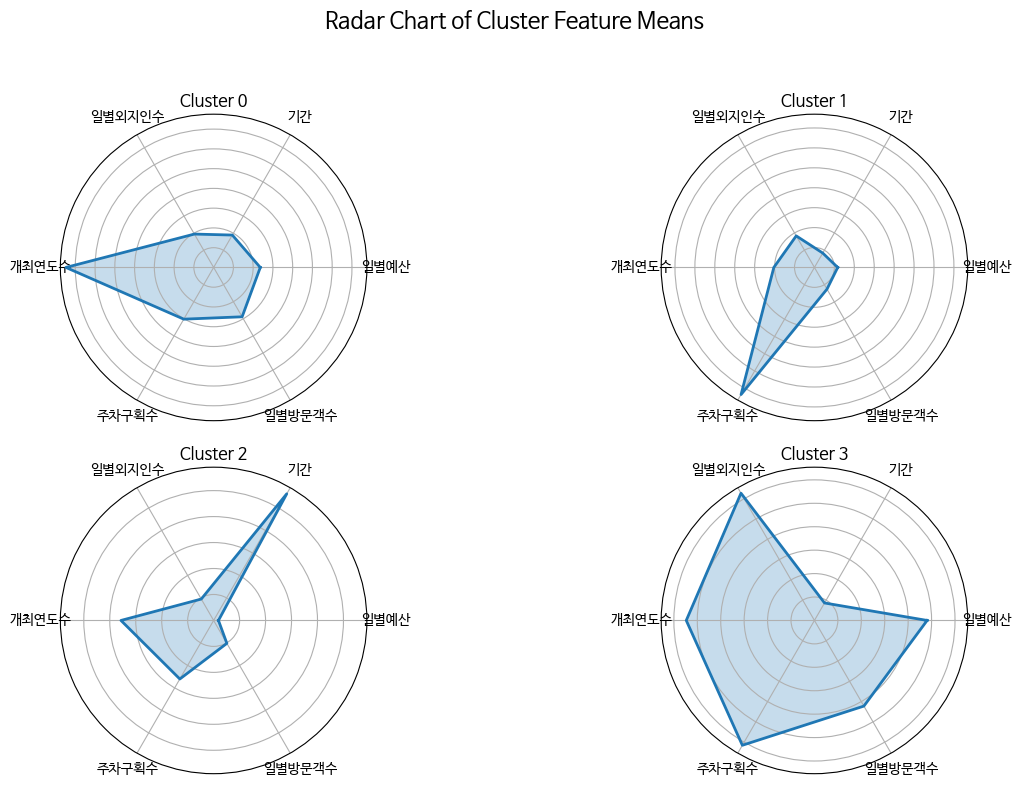

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

tmp = df_with_labels.drop(columns=['Cluster']).copy()
tmp['일별방문객수'] = fest['일별방문객수'].values

# 변수 스케일링
scaler = MinMaxScaler(feature_range=(0,1))
radar_df = scaler.fit_transform(tmp)

df_with_labels = pd.DataFrame(radar_df, columns=tmp.columns)
df_with_labels['Cluster'] = kmeans_labels
feature_means_by_cluster = df_with_labels.groupby('Cluster').mean()

# 클러스터별 평균값을 레이다 차트로 표현
labels = feature_means_by_cluster.columns
num_vars = len(labels)
num_clusters = len(feature_means_by_cluster)

# 서브플롯 생성 (2행 n열로 클러스터 수에 따라 조정)
fig, axs = plt.subplots(2, (num_clusters + 1) // 2, figsize=(13, 8), subplot_kw=dict(polar=True))
axs = axs.flatten()  # 2D 배열을 1D 배열로 변환하여 접근하기 쉽게

# 각 클러스터에 대해 레이더 차트 그리기
for i in range(num_clusters):
    values = feature_means_by_cluster.iloc[i].values.flatten().tolist()
    values += values[:1]  # 처음 값을 다시 끝에 추가하여 폐곡선 만듦
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # 각 클러스터의 레이더 차트를 서브플롯에 그리기
    axs[i].fill(angles, values, alpha=0.25, label=f'Cluster {i}')
    axs[i].plot(angles, values, linewidth=2)
    axs[i].set_yticklabels([])
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(labels)
    axs[i].set_title(f'Cluster {i}')

# 남은 빈 서브플롯을 숨김
if num_clusters % 2 != 0:
    axs[-1].axis('off')

# 전체 타이틀 설정
plt.suptitle('Radar Chart of Cluster Feature Means', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Cluster 0: **개최연도수**가 눈에 띄게 높다. 이 클러스터에 속한 데이터는 대부분 전통성을 가진 오래 열렸던 축제임을 의미한다.
나머지 변수들(일별외지인수, 주차구획수, 기간, 일별방문객수, 일별예산)은 중앙에 가까워 값이 낮고, 상대적으로 중요성이 적다.

- Cluster 1: **일별예산**에서 가장 높은 값을 가지고 있으며, 일별 예산이 큰 것이 중요한 역할을 하는 군집이다.
개최연도수는 거의 0에 가깝고, 주차구획수도 낮은 편이다.
기간은 중간 정도의 값을 가지고 있다.

- Cluster 2:**기간**이 가장 두드러지게 높은 값을 보인다. 이 클러스터에서는 긴 기간 축제를 진행한 것이 매우 중요한 영향을 미친다는 의미이다.
나머지 변수들, 특히 주차구획수, 일별방문객수는 매우 낮은 값을 나타내고 있어 큰 영향을 미치지 않습니다.

- Cluster 3: 여러 변수들(일별예산, 일별방문객수, 주차구획수, 일별외지인수)에서 높은 값을 보인다.
이 클러스터는 **여러 변수가 고르게 중요한 역할**을 하고 있습니다. 특히 **일별예산, 주차구획수** 등이 다른 클러스터에 비해 큰 값을 보인다.
개최연도수와 기간도 비교적 중간 수준의 값으로, 이 클러스터는 다양한 변수들이 고르게 작용하는 특성이 있다.



**[종합 분석]**:

Cluster 0: **개최된 연도 수**가 중요한 변수.

Cluster 1: **일별 예산**이 주요 변수.

Cluster 2: **기간**이 중요한 변수.

Cluster 3: 여러 변수가 고르게 영향을 미치는 클러스터.